In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, classification_report

In [94]:
data = pd.read_csv('adult_data.csv')
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary']

In [95]:
# EDA
print(data.info())
print(70*'-')
print(data.describe())
print(70*'-')
print(data.shape)
print(70*'-')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
----------------------------------------------------------------------
                a

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\Md's_PC\AppData\Local\Temp\ipykernel_12620\2695179791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

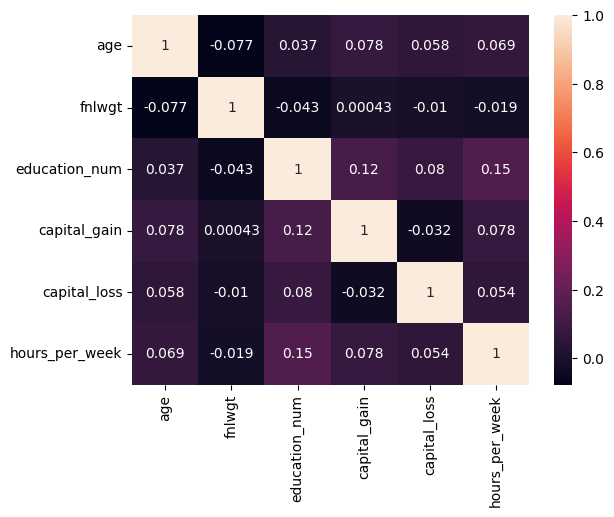

In [96]:
corr = data.corr()
sns.heatmap(corr,annot = True)

In [97]:
data.drop('fnlwgt', 1, inplace = True)

C:\Users\Md's_PC\AppData\Local\Temp\ipykernel_12620\445370033.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('fnlwgt', 1, inplace = True)


In [98]:
# Data Handling
# Captial gain
def handle_capital_gain_log(data):
    data['capital_gain'] = np.where(data['capital_gain'] == 0, np.nan, data['capital_gain'])
    data['capital_gain'] = np.log(data['capital_gain'])
    data['capital_gain'] = data['capital_gain'].replace(np.nan, 0)


#Capital_loss
def handle_capital_loss_log(data):
    data['capital_loss'] = np.where(data['capital_loss'] == 0, np.nan, data['capital_loss'])
    data['capital_loss'] = np.log(data['capital_loss'])
    data['capital_loss'] = data['capital_loss'].replace(np.nan, 0)
    
    
# Salary
def handle_salary(data):
    data['salary'] = data['salary'].replace(' >50K', '>50K')
    data['salary'] = np.where(data['salary'] == '>50K', 1, 0)
    
    
# Hours per week
def handle_hours_per_week(data):
    IQR = data['hours_per_week'].quantile(0.75) - data['hours_per_week'].quantile(0.25)
    lower_range = data['hours_per_week'].quantile(0.25) - (1.5*IQR)
    upper_range = data['hours_per_week'].quantile(0.75) + (1.5*IQR)
    data['hours_per_week'] = np.where(data['hours_per_week'] <= lower_range, lower_range, data['hours_per_week'])
    data['hours_per_week'] = np.where(data['hours_per_week'] >= upper_range, upper_range, data['hours_per_week'])


# Education Number
def handle_eductaion_num(data):
    IQR = data['education_num'].quantile(0.75) - data['education_num'].quantile(0.25)
    lower_range = data['education_num'].quantile(0.25) - (1.5*IQR)
    upper_range = data['education_num'].quantile(0.75) + (1.5*IQR)
    data['education_num'] = np.where(data['education_num'] <= lower_range, lower_range, data['education_num'])
    data['education_num'] = np.where(data['education_num'] >= upper_range, upper_range, data['education_num'])

    
# Capital gain
def handle_capital_gain(data):
    IQR = data['capital_gain'].quantile(0.75) - data['capital_gain'].quantile(0.25)
    lower_range = data['capital_gain'].quantile(0.25) - (1.5*IQR)
    upper_range = data['capital_gain'].quantile(0.75) + (1.5*IQR)
    data['capital_gain'] = np.where(data['capital_gain'] <= lower_range, lower_range, data['capital_gain'])
    data['capital_gain'] = np.where(data['capital_gain'] >= upper_range, upper_range, data['capital_gain'])

    
# Capital Loss
def handle_capital_loss(data):
    IQR = data['capital_loss'].quantile(0.75) - data['capital_loss'].quantile(0.25)
    lower_range = data['capital_loss'].quantile(0.25) - (1.5*IQR)
    upper_range = data['capital_loss'].quantile(0.75) + (1.5*IQR)
    data['capital_loss'] = np.where(data['capital_loss'] <= lower_range, lower_range, data['capital_loss'])
    data['capital_loss'] = np.where(data['capital_loss'] >= upper_range, upper_range, data['capital_loss'])

handle_capital_gain_log(data)
handle_capital_loss_log(data)
handle_capital_gain(data)
handle_capital_loss(data)
handle_eductaion_num(data)
handle_hours_per_week(data)
handle_salary(data)
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [99]:
# Feature Engineering
def feature_engineering(data):
    # Sex
    data['sex'] = np.where(data['sex'] == 'Male', 1, 0)
    
    # Race
    label_enco_race = {race: number for number, race in enumerate(data['race'].unique())}
    data['race'] = data['race'].map(label_enco_race)
    
    # Relationship
    label_enco_relationship = {relationship: number for number, relationship in enumerate(data['relationship'].unique())}
    data['relationship'] = data['relationship'].map(label_enco_relationship)
    
    # Occupation
    label_enco_occupation = {occupation: number for number, occupation in enumerate(data['occupation'].unique())}
    data['occupation'] = data['occupation'].map(label_enco_occupation)
    
    # Marital Status
    label_enco_marital_status = {marital_status: number for number, marital_status in enumerate(data['marital_status'].unique())}
    data['marital_status'] = data['marital_status'].map(label_enco_marital_status)
    
    # Education
    label_enco_education = {education: number for number, education in enumerate(data['education'].unique())}
    data['education'] = data['education'].map(label_enco_education)
    
    # Work_class
    data['workclass'] = np.where(data['workclass'] == " ?", 'Missing', data['workclass'])
    label_enco_work_class = {workclass: number for number, workclass in enumerate(data['workclass'].unique())}
    data['workclass'] = data['workclass'].map(label_enco_work_class)
    
    # Native
    data['native_country'] = np.where(data['native_country'] == " ?", 'Missing', data['native_country'])
    label_enco_native = {native: number for number, native in enumerate(data['native_country'].unique())}
    data['native_country'] = data['native_country'].map(label_enco_native)
    
feature_engineering(data)

In [102]:
data.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,0.0,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.0,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.0,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.0,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.0,0.0,40.0,1,0
5,37,2,3,14.0,1,1,2,0,0,0.0,0.0,40.0,0,0
6,49,2,4,5.0,3,4,0,1,0,0.0,0.0,32.5,2,0
7,52,1,1,9.0,1,1,1,0,0,0.0,0.0,45.0,0,1
8,31,2,3,14.0,0,3,0,0,0,0.0,0.0,50.0,0,1
9,42,2,0,13.0,1,1,1,0,0,0.0,0.0,40.0,0,1


In [103]:
# Model Building
X = data[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]
y = data['salary']
sc = StandardScaler()
x = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

(26048, 13)
(26048,)


LogisticRegression()

In [104]:
prediction = lg_model.predict(X_test)

In [106]:
result = {
    'Actual' : y_test,
    'Predict' : prediction
}
pd.DataFrame(result)

,Actual,Predict
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,0
...,...,...
1338,0,0
24534,1,0
18080,1,1
10354,0,0


In [109]:
print("Accuracy Score: {}".format(accuracy_score(y_test, prediction)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, prediction)))
print("Classification Report:\n {}".format(classification_report(y_test, prediction)))

Accuracy Score: 0.7956394902502687
Confusion Matrix:
 [[4617  325]
 [1006  565]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      4942
           1       0.63      0.36      0.46      1571

    accuracy                           0.80      6513
   macro avg       0.73      0.65      0.67      6513
weighted avg       0.78      0.80      0.77      6513

